In [70]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [72]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [73]:
from citipy import citipy

In [74]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [75]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [76]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [77]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea586a92e1fbdf7e55a991b862de0737


In [80]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | crab hill
City not found. Skipping...
Processing Record 5 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | san quintin
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | knysna
Processing Record 12 of Set 1 | marawi
Processing Record 13 of Set 1 | lata
Processing Record 14 of Set 1 | port hardy
Processing Record 15 of Set 1 | sao gabriel da cachoeira
Processing Record 16 of Set 1 | banda aceh
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | vardo
Processing Record 21 of Set 1

Processing Record 37 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 38 of Set 4 | iqaluit
Processing Record 39 of Set 4 | huarmey
Processing Record 40 of Set 4 | vanavara
Processing Record 41 of Set 4 | ostrovnoy
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | athens
Processing Record 45 of Set 4 | kafanchan
Processing Record 46 of Set 4 | viligili
City not found. Skipping...
Processing Record 47 of Set 4 | limpapa
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | zhezkazgan
Processing Record 50 of Set 4 | zheshart
Processing Record 1 of Set 5 | achisay
City not found. Skipping...
Processing Record 2 of Set 5 | asau
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | saint-augustin
Processing Record 5 of Set 5 | macatuba
Processing Record 6 of Set 5 | qasigiannguit
Processing Record 7 of Set 5 | teguise
Processing Record 8 of Set 5 | barawe
City not found. Skippi

Processing Record 24 of Set 8 | komsomolskiy
Processing Record 25 of Set 8 | eidsvag
Processing Record 26 of Set 8 | bathsheba
Processing Record 27 of Set 8 | merauke
Processing Record 28 of Set 8 | sangar
Processing Record 29 of Set 8 | torbay
Processing Record 30 of Set 8 | vila velha
Processing Record 31 of Set 8 | clermont
Processing Record 32 of Set 8 | alamos
Processing Record 33 of Set 8 | kalmunai
Processing Record 34 of Set 8 | sola
Processing Record 35 of Set 8 | igrim
Processing Record 36 of Set 8 | clyde river
Processing Record 37 of Set 8 | bowen
Processing Record 38 of Set 8 | salalah
Processing Record 39 of Set 8 | ostroleka
Processing Record 40 of Set 8 | moussoro
Processing Record 41 of Set 8 | ayacucho
Processing Record 42 of Set 8 | la asuncion
Processing Record 43 of Set 8 | comodoro rivadavia
Processing Record 44 of Set 8 | pacific grove
Processing Record 45 of Set 8 | labutta
City not found. Skipping...
Processing Record 46 of Set 8 | mingshui
Processing Record 47

Processing Record 11 of Set 12 | caravelas
Processing Record 12 of Set 12 | limbe
Processing Record 13 of Set 12 | panaba
Processing Record 14 of Set 12 | sal rei
Processing Record 15 of Set 12 | bichura
Processing Record 16 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 17 of Set 12 | verkh-usugli
Processing Record 18 of Set 12 | sheridan
Processing Record 19 of Set 12 | talcahuano
Processing Record 20 of Set 12 | sompeta
Processing Record 21 of Set 12 | eliot
Processing Record 22 of Set 12 | camana
Processing Record 23 of Set 12 | kathu
Processing Record 24 of Set 12 | luderitz
Processing Record 25 of Set 12 | lubango
Processing Record 26 of Set 12 | sistranda
Processing Record 27 of Set 12 | amberley
Processing Record 28 of Set 12 | mandera
Processing Record 29 of Set 12 | vuktyl
Processing Record 30 of Set 12 | waingapu
Processing Record 31 of Set 12 | lichinga
Processing Record 32 of Set 12 | kassala
Processing Record 33 of Set 12 | grimshaw
Processing Record

In [81]:
len(city_data)

543

In [82]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,58.87,74,100,1.99,AU,2021-06-06 23:35:20
1,Georgetown,5.4112,100.3354,80.53,92,20,2.30,MY,2021-06-06 23:37:48
2,Dikson,73.5069,80.5464,29.91,91,99,12.91,RU,2021-06-06 23:38:28
3,Lebu,-37.6167,-73.6500,48.51,80,92,5.91,CL,2021-06-06 23:36:58
4,Mataura,-46.1927,168.8643,49.48,70,49,4.09,NZ,2021-06-06 23:36:44
5,San Quintin,30.4833,-115.9500,65.25,65,12,11.50,MX,2021-06-06 23:38:29
6,Punta Arenas,-53.1500,-70.9167,41.11,81,0,10.25,CL,2021-06-06 23:36:42
7,Hermanus,-34.4187,19.2345,66.90,44,1,11.52,ZA,2021-06-06 23:38:29
8,Knysna,-34.0363,23.0471,73.78,26,2,11.79,ZA,2021-06-06 23:37:34
9,Marawi,7.9986,124.2928,74.07,78,99,1.88,PH,2021-06-06 23:34:15


In [83]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [84]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [85]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [87]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/06/21'

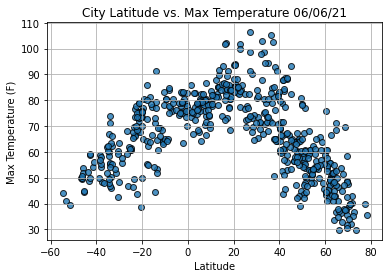

In [88]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

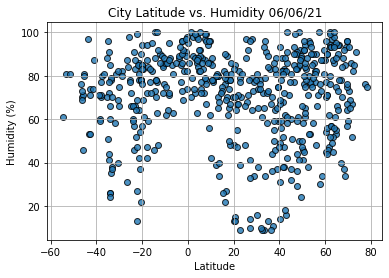

In [89]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

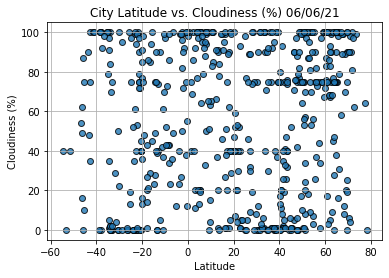

In [90]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

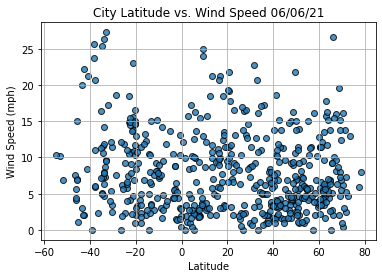

In [91]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()